#  Exploratory Data Analysis of Sales Data during any festival like Diwali

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
# import csv file
df = pd.read_csv(r"D:\Downloads\Diwali Sales Data.csv", encoding="unicode_escape")
#to avoid encoding error , use 'unicode enocoder'

In [5]:
df.shape


(11251, 15)

In [7]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
#drop blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [13]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
# drop null values
df.dropna(inplace=True)

In [17]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [19]:
df['Amount'].dtypes


dtype('int32')

In [21]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [23]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [26]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\114230895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df, palette=['#FF9999', '#66B3FF'])


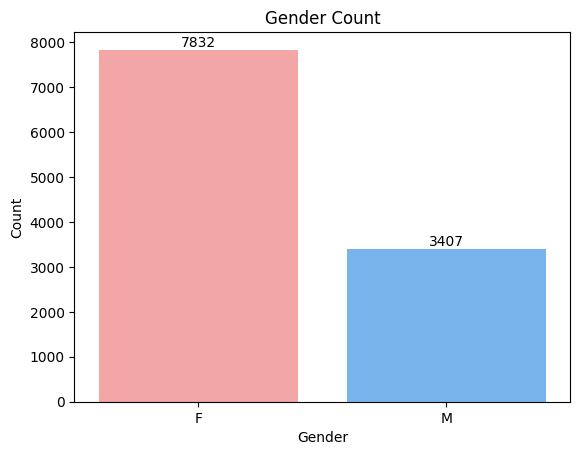

In [38]:
# plotting a bar chart for Gender and it's count


ax = sns.countplot(x='Gender', data=df, palette=['#FF9999', '#66B3FF'])

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [40]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)


,Gender,Amount
0,F,74335853
1,M,31913276


C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\141261102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=['#FF9999', '#66B3FF'])  # Custom colors


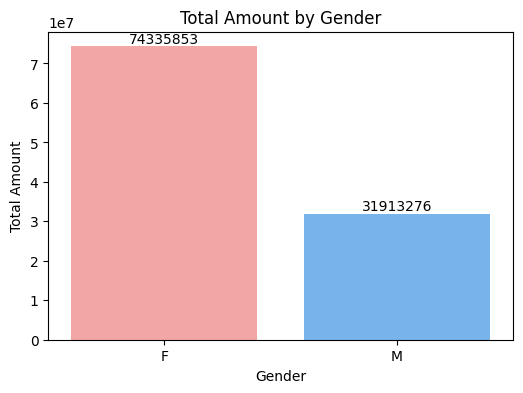

In [44]:
# Grouping and sorting data
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Create bar plot with custom colors
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=['#FF9999', '#66B3FF'])  # Custom colors

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f')  # Formatting to remove decimals

# Customizing the plot
plt.title('Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

### Summary 



*From the graphs above, it is evident that the majority of buyers are female, and their purchasing power exceeds that of males.*


------------------------------------------------------------------------

# Age

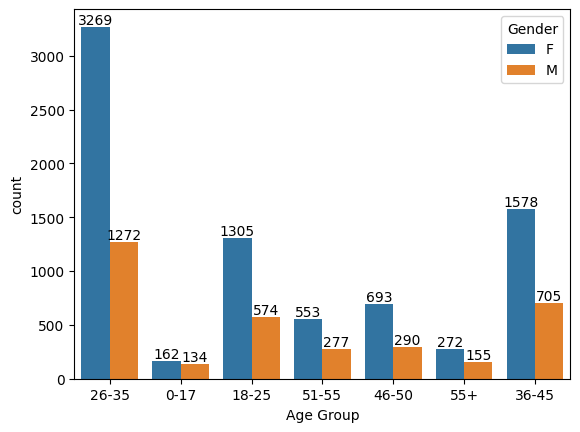

In [58]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)


C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\3721921481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age Group', y='Amount', data=sales_age, palette='coolwarm')  # Using a color gradient


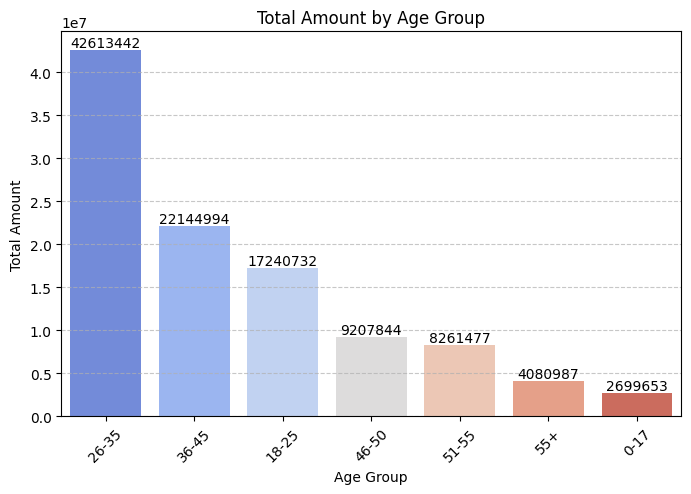

In [62]:
# Grouping and sorting data
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Create bar plot with custom colors
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Age Group', y='Amount', data=sales_age, palette='coolwarm')  # Using a color gradient

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f')  # Formatting to remove decimals

# Customizing the plot
plt.title('Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity
plt.show()

### Summary

*From the graphs above, we can see that most of the buyers are females aged between 26-35 years.*

*

-----------------------------------------------------------------------------------

# State

C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\62353643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='State', y='Orders', palette='viridis')


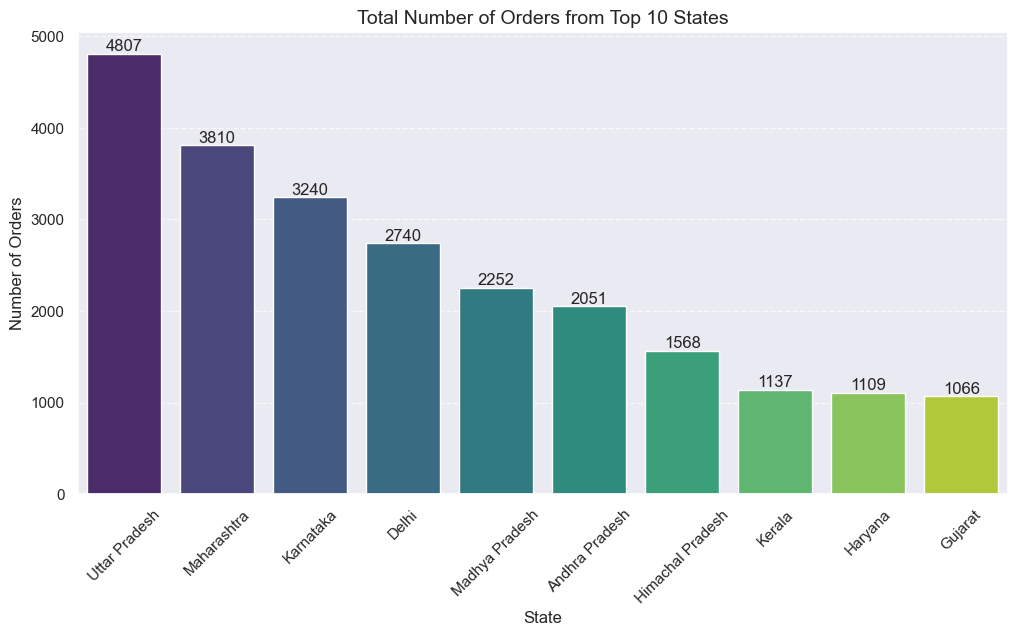

In [75]:
# Grouping and selecting top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot with a custom color palette
ax = sns.barplot(data=sales_state, x='State', y='Orders', palette='viridis')

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')  # Integer formatting

# Customize plot
plt.title('Total Number of Orders from Top 10 States', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)  # Rotate state names for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Show plot
plt.show()


C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\3415237560.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='State', y='Amount', palette='coolwarm')


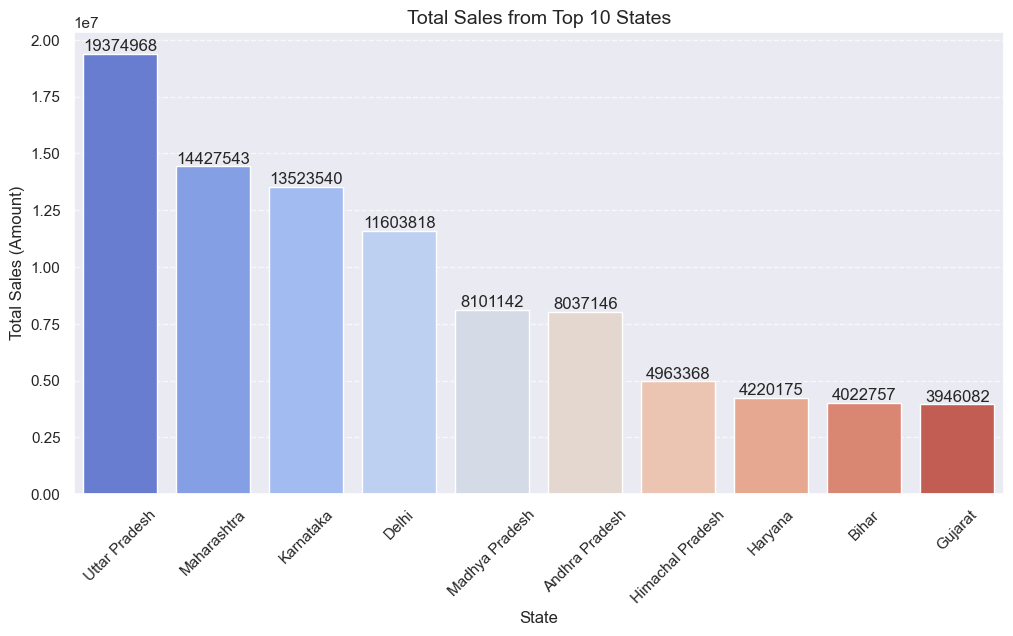

In [77]:
# Grouping and selecting top 10 states by sales amount
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot with a custom color palette
ax = sns.barplot(data=sales_state, x='State', y='Amount', palette='coolwarm')

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')  # Integer formatting for sales amount

# Customize plot
plt.title('Total Sales from Top 10 States', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales (Amount)', fontsize=12)
plt.xticks(rotation=45)  # Rotate state names for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity

# Show plot
plt.show()

### Summary

*From the graphs above, we can see that most of the orders and total sales/amount come from Uttar Pradesh, Maharashtra, and Karnataka, respectively.*  


-----------------------------------------------------------------------------------

# Marital Status


C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\2825379432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Marital_Status', palette='pastel')


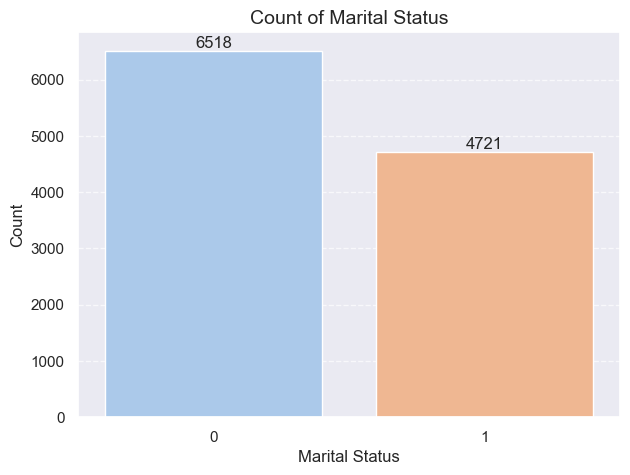

In [83]:

# Set figure size before plotting
sns.set(rc={'figure.figsize': (7, 5)})

# Create count plot with custom colors
ax = sns.countplot(data=df, x='Marital_Status', palette='pastel')

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars)

# Customize plot
plt.title('Count of Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid lines for better readability

# Show plot
plt.show()

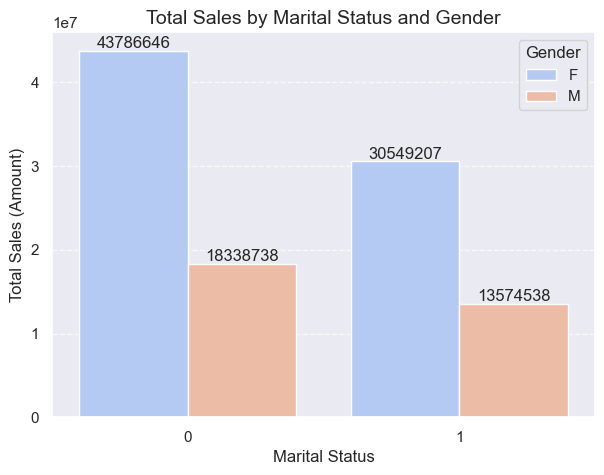

In [85]:
# Group by Marital Status & Gender, then sort by Amount
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set figure size
sns.set(rc={'figure.figsize': (7, 5)})

# Create grouped bar plot
ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender', palette='coolwarm')

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')

# Customize plot
plt.title('Total Sales by Marital Status and Gender', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Sales (Amount)', fontsize=12)
plt.legend(title='Gender')  # Improve legend readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid lines

# Show plot
plt.show()

### Summary

*From the graphs above, we can see that most of the buyers are married women, and they have high purchasing power.*  


------------------------------------------------------------------------------------------------------------------------------

# Occupation

C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\2784629370.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Occupation', palette='Set2', order=df['Occupation'].value_counts().index)


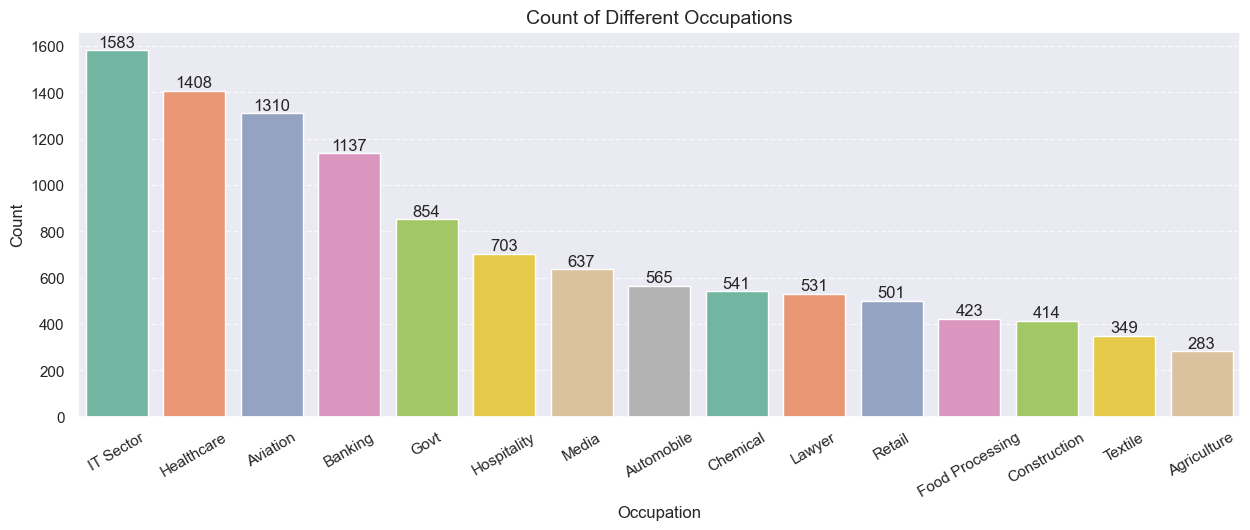

In [95]:
# Set figure size before plotting
sns.set(rc={'figure.figsize': (15, 5)})  # Adjust width to avoid crowding

# Create count plot with a custom color palette
ax = sns.countplot(data=df, x='Occupation', palette='Set2', order=df['Occupation'].value_counts().index)

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars)

# Customize plot
plt.title('Count of Different Occupations', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid lines

# Show plot
plt.show()


C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\3502197907.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', palette='viridis')


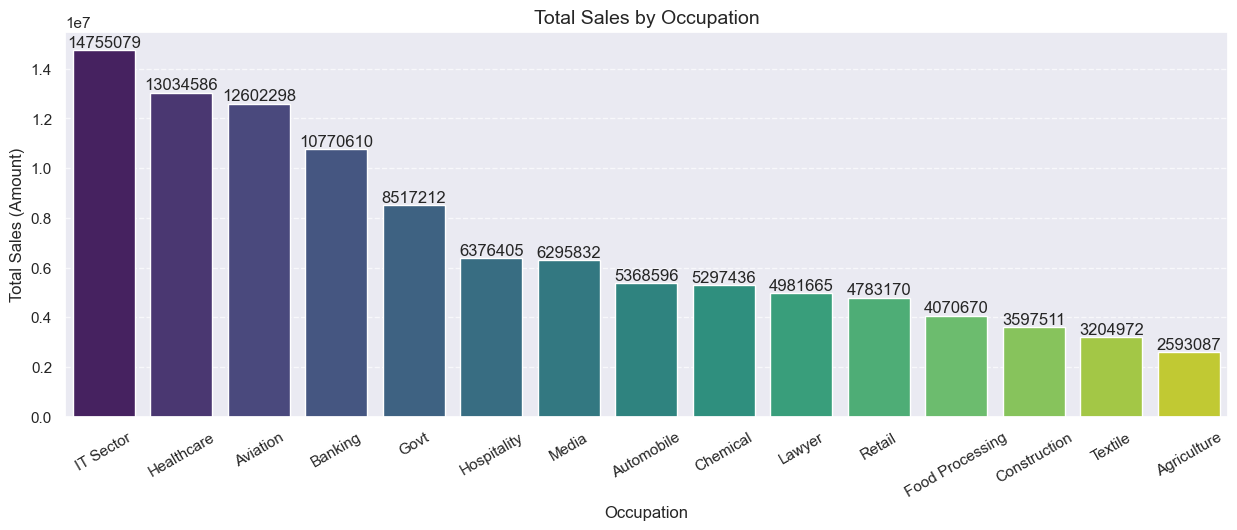

In [97]:
# Grouping and sorting total sales by occupation
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set figure size before plotting
sns.set(rc={'figure.figsize': (15, 5)})  # Adjust width to prevent crowding

# Create bar plot with a custom color palette
ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', palette='viridis')

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')

# Customize plot
plt.title('Total Sales by Occupation', fontsize=14)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Total Sales (Amount)', fontsize=12)
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid lines

# Show plot
plt.show()

### Summary

*From the graphs above, we can see that most of the buyers work in the IT, Healthcare, and Aviation sectors.*  


------------------------------------------------------------------------------------------------------------------------------

# Product Category


C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\4162394730.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Product_Category', palette='coolwarm', order=df['Product_Category'].value_counts().index)


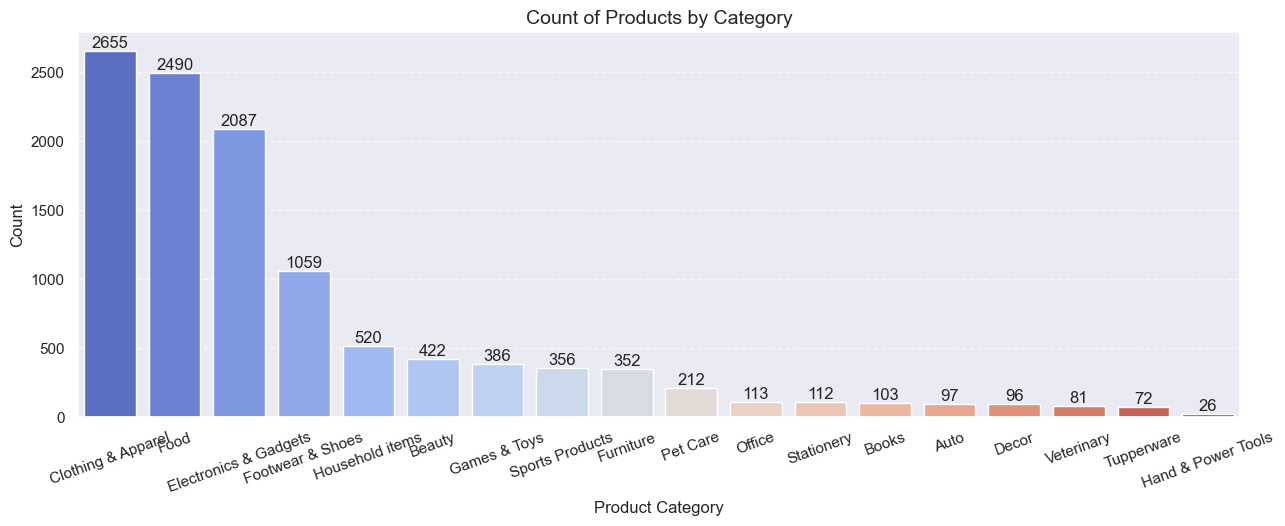

In [103]:
# Set figure size
sns.set(rc={'figure.figsize': (15, 5)})  # Adjust width to prevent crowding

# Create count plot with sorted categories
ax = sns.countplot(data=df, x='Product_Category', palette='coolwarm', order=df['Product_Category'].value_counts().index)

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars)

# Customize plot
plt.title('Count of Products by Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=20)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid lines

# Show plot
plt.show()

C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\202004978.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette='plasma')


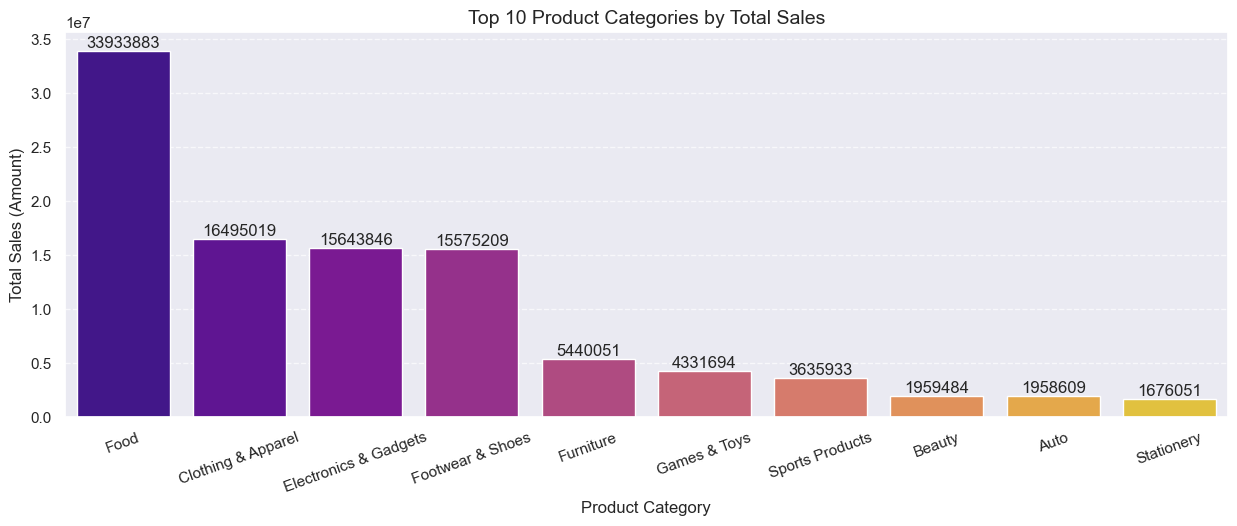

In [105]:
# Grouping and sorting total sales by product category (Top 10)
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Set figure size before plotting
sns.set(rc={'figure.figsize': (15, 5)})  # Adjust width to prevent crowding

# Create bar plot with a custom color palette
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette='plasma')

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')

# Customize plot
plt.title('Top 10 Product Categories by Total Sales', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales (Amount)', fontsize=12)
plt.xticks(rotation=20)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid lines

# Show plot
plt.show()

### Summary

*From the graphs above, we can see that most of the sold products belong to the Food, Clothing, and Electronics categories.*  


C:\Users\tirol\AppData\Local\Temp\ipykernel_7176\3426662806.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_state, x='Product_ID', y='Orders', palette='magma')


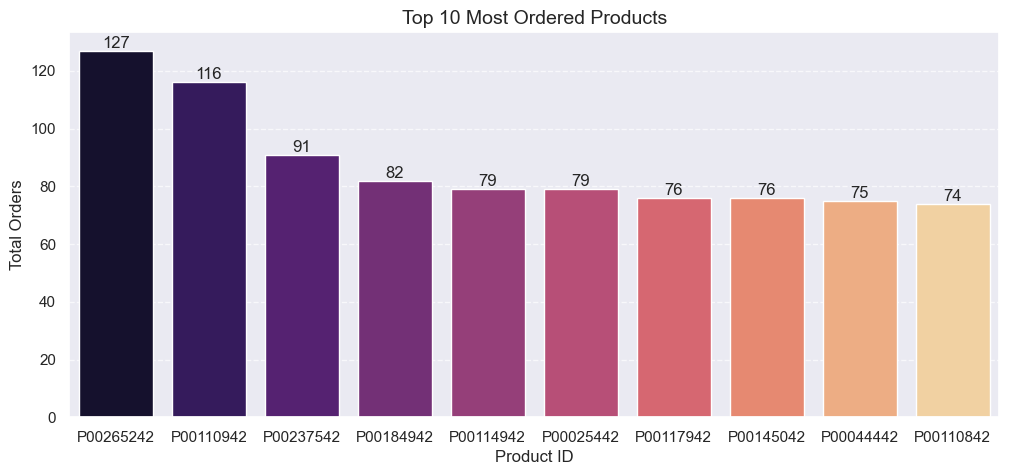

In [109]:

# Grouping and sorting total orders by product ID (Top 10)
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

# Set figure size
sns.set(rc={'figure.figsize': (12, 5)})  # Adjusted to prevent crowding

# Create bar plot with custom color palette
ax = sns.barplot(data=sales_state, x='Product_ID', y='Orders', palette='magma')

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')

# Customize plot
plt.title('Top 10 Most Ordered Products', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=0)  # Keep labels readable
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light grid for clarity

# Show plot
plt.show()

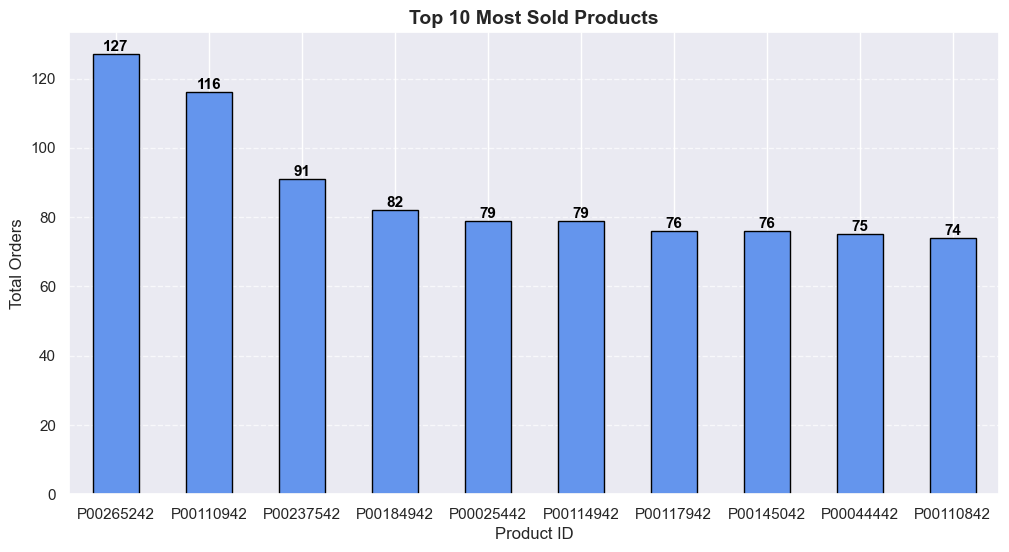

In [111]:
# Get top 10 most sold products
top_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
top_products.plot(kind='bar', color='cornflowerblue', edgecolor='black', ax=ax)

# Add labels and title
ax.set_title('Top 10 Most Sold Products', fontsize=14, fontweight='bold')
ax.set_xlabel('Product ID', fontsize=12)
ax.set_ylabel('Total Orders', fontsize=12)

# Display exact order count above bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height())}', 
            ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Rotate x-axis labels if necessary
plt.xticks(rotation=0)  

# Show gridlines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------

# Final Conclusion  

## Key Insights from Sales Data Analysis  

### 1. Demographics & Purchasing Power  
- The majority of buyers are **female**, particularly those aged **26-35 years**.  
- Married women exhibit **higher purchasing power**, indicating they are key decision-makers in festival shopping.  

### 2. Regional Trends  
- The highest sales volume comes from **Uttar Pradesh, Maharashtra, and Karnataka**, making them the most significant markets during the festival season.  

### 3. Professional Background  
- Most buyers are employed in the **IT, Healthcare, and Aviation** sectors, suggesting that individuals from these industries contribute significantly to festival-related sales.  

### 4. Product Preferences  
- The most purchased product categories are **Food, Clothing, and Electronics**, highlighting a preference for festive essentials, fashion, and gadgets.  

## Business Implications  
- **Targeted Marketing**: Brands should focus their marketing campaigns on **female customers, particularly married women aged 26-35**, to maximize engagement and conversions.  
- **Regional Promotions**: Special discounts and promotions in **Uttar Pradesh, Maharashtra, and Karnataka** can further boost sales.  
- **Sector-Specific Advertising**: Tailoring promotions towards professionals in **IT, Healthcare, and Aviation** may yield higher returns.  
- **Product Positioning**: Retailers should prioritize stocking **Food, Clothing, and Electronics** to meet consumer demand during festivals.  

### Conclusion  
The analysis underscores the importance of understanding customer demographics, location preferences, and product trends to optimize sales strategies during major festivals like Diwali.
